0.15021700000000138 seconds
0.13603399999999866 seconds
0.24936399999999992 seconds
3.6441300000000005 seconds
3.727430000000002 seconds


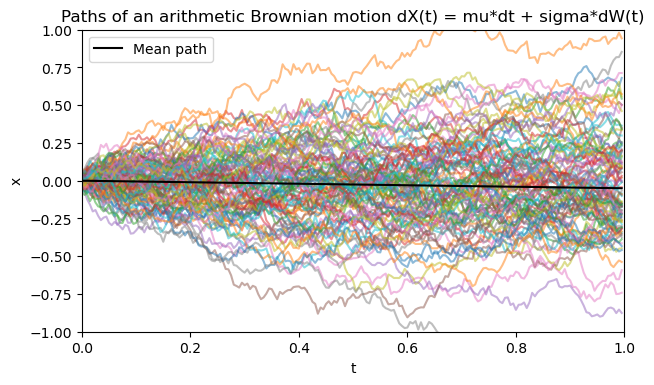

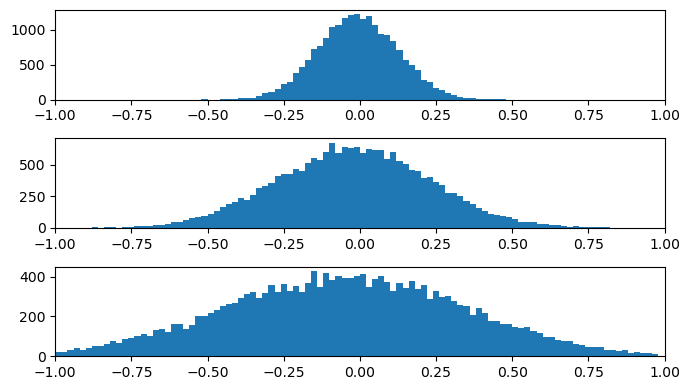

In [21]:
#!/usr/bin/python3.7
#Assignment3_1.ipynb
#Parth Parakh
#purpose: Simulate Arithmetic Brownian Motion
#dX(t) = mu*dt + sigma*dW(t)

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
import time
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
mu = -0.05; sigma = 0.4; #model parameters

#----------------------------------------------------------------------
start_time = time.process_time()
drift = mu*dt;
diffusion = sigma*np.sqrt(dt)*np.random.normal(0,1,(nsteps,npaths));
dx = drift + diffusion;
x = np.cumsum(dx,axis=0);
print (time.process_time() - start_time, "seconds")
#----------------------------------------------------------------------
#a)
start_time = time.process_time()
drift = mu*dt;
diffusion = sigma*np.sqrt(dt);
N = np.random.normal(0,1,(nsteps,npaths));
dx_a = np.zeros(nsteps*npaths);
dx_a.resize(nsteps,npaths);
for i in range(0,nsteps-1):
    dx_a[i+1,:] = dx_a[i,:] + drift + diffusion*N[i,:];
x = np.cumsum(dx,axis=0);
print (time.process_time() - start_time, "seconds")
#----------------------------------------------------------------------
#b)
start_time = time.process_time()
drift = mu*dt;
diffusion = sigma*np.sqrt(dt);
N = np.random.normal(0,1,(nsteps,npaths));
dx_b = np.zeros(nsteps*npaths);
dx_b.resize(nsteps,npaths);
for i in range(0,npaths-1):
    dx_b[:,i+1] = dx_b[:,i] + drift + diffusion*N[:,i];
x = np.cumsum(dx,axis=0);
print (time.process_time() - start_time, "seconds")
#----------------------------------------------------------------------
#c_1)
start_time = time.process_time()
drift = mu*dt;
diffusion = sigma*np.sqrt(dt);
N = np.random.normal(0,1,(nsteps,npaths));
dx_b = np.zeros(nsteps*npaths);
dx_b.resize(nsteps,npaths);
for i in range(0,npaths-1):
    for j in range(0,nsteps-1):
        dx_b[j+1,i+1] = dx_b[j,i] + drift + diffusion*N[j,i];
x = np.cumsum(dx,axis=0);
print (time.process_time() - start_time, "seconds")
#----------------------------------------------------------------------
#c_2)
start_time = time.process_time()
drift = mu*dt;
diffusion = sigma*np.sqrt(dt);
N = np.random.normal(0,1,(nsteps,npaths));
dx_b = np.zeros(nsteps*npaths);
dx_b.resize(nsteps,npaths);
for i in range(0,nsteps-1):
    for j in range(0,npaths-1):
        dx_b[i+1,j+1] = dx_b[i,j] + drift + diffusion*N[i,j];
x = np.cumsum(dx,axis=0);
print (time.process_time() - start_time, "seconds")
#----------------------------------------------------------------------
Ex = mu*t;
plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,100):
    plt.plot(t,x[:,i],alpha=0.5)
plt.plot(t,Ex,'black', label = 'Mean path')    
plt.ylim(-1,1)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of an arithmetic Brownian motion dX(t) = mu*dt + sigma*dW(t)')
plt.show()

plot2 = plt.figure(2,figsize=(7,4), dpi=100)
s = np.arange(-1,1,0.02);
plt.subplot(3,1,1)
plt.hist(x[20,:],s)
plt.xlim(-1,1)
plt.tight_layout()

plt.subplot(3,1,2)
plt.hist(x[80,:],s)
plt.xlim(-1,1)
plt.tight_layout()

plt.subplot(3,1,3)
plt.hist(x[199,:],s)
plt.xlim(-1,1)
plt.tight_layout()